# Week 2 Lab: Classification, Parameter & Feature Selection

In this week's lab, we'll be focusing on implementing the following new supervised learning estimators:
* Support Vector Machines
* Random Forest Classifiers

In addition, we'll look at techniques to optimize both the **parameter** values for our estimators, as well the **features** that we decide to use with them. We'll explore these concepts by using the following Python functions:
* GridSearchCV
* SelectFromModel
* RFE (Recursive Feature Elimination)

## Support Vector Machines

## Import Libraries

Import the usual libraries, `pandas` as `pd` and `numpy` as `np`, and `matplotlib.pyplot` as `plt`. (Remember to also
`%matplotlib inline`).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

We'll use the built in breast cancer dataset from Scikit Learn: `load_breast_cancer`. We can `import` it `from sklearn.datasets`. The dataset can be loaded by calling `load_breast_cancer()`. Save it in a variable called `cancer`.

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

We have worked with dataframes up until now, but this data set is presented in a dictionary form. Print out it's `keys`:

In [6]:
cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features. The feature data is stored in `'data'`, the feature names are stored in `'feature_names'`, and the labels are stored in `target`. Print the `'feature_names'` to see them.

In [8]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='|S23')

## Set up DataFrame

Now let's set up our dataset into a pandas dataframe. The `'data'` key from the `cancer` dictionary will be our feature data for our dataframe, and `'feature_names'` will be the columns. Store these features in `df_feat`.

In [9]:
df_feat = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])

Print out the `head` of `df_feat`.

In [10]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The `target` key contains our labels (classes). Check it: you should see that it contains an array of 1s and 0s.

In [12]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

Store the target in a labels dataframe. Call it `df_target`. The data is the `target` key, and we can call the columns `Cancer`.

In [28]:
df_target = pd.DataFrame(cancer['target'], columns=['Cancer'])

Print `df_target`. You shoud see a very simple dataframe containing 0s (and 1s).

In [29]:
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


## Train Test Split

Use `train_test_split` with `test_size=0.3` and `random_state=101`. We also want to convert our labels (`df_target`) from a column vector to a 1d array. Use the `np.ravel` function to do this! Do this when passing it as the `y` variable in `train_test_split`.

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.3, random_state=101)
type(y_test)

numpy.ndarray

# Train the Support Vector Classifier

`from sklearn.svm import SVC`. Then, create a new `SVC()` instance, and save it in `model`.

In [59]:
from sklearn.svm import SVC
model = SVC()

Fit the model to `X_train` and `y_train`.

In [60]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predictions and Evaluations

Now let's predict using the trained model. Call `predict` on `X_test`, and print the `confusion_matrix` and the `classification_report`.

In [61]:
y_predict = model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
report = classification_report(y_test, y_predict)
print(report)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



In [64]:
confusion_matrix(y_test, y_predict)

array([[  0,  66],
       [  0, 105]])

Woah! You should see very low numbers: `0.38` for `precision`, `0.61` for `recall`, and `0.47` for `f1-score`. Notice that we are classifying everything into a single class (Class `1`)! This means our model needs to have it parameters adjusted (it may also help to normalize the data).

We can search for parameters using a GridSearch!

# GridsearchCV

Finding the right parameters (like what `C` or `gamma` values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.  Use the following values for `param_grid`:
* `'C': [0.1,1, 10, 100, 1000]`
* `'gamma': [1,0.1,0.01,0.001,0.0001]`
* `'kernel': ['rbf']`

In [65]:
param_grid = {
    'C': [0.1,1, 10, 100, 1000],
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'kernel': ['rbf']
}

In [66]:
from sklearn.grid_search import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add `refit=True` and choose verbose to whatever number you want (egs: `3`), higher the number, the more verbose (verbose just means the text output describing the process). `GridSearchCV` can be imported from `sklearn.model_selection`.

In [67]:
# from sklearn.model_selection import GridSearchCV
model_search = GridSearchCV(model, param_grid=param_grid, refit=True, verbose=3)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting. Call `fit` on your `grid` object on `X_train` and `y_train`.

In [68]:
model_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.636364 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV] .......... kernel=rbf, C=0.1, gamma=0.01, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV] .......... kernel=rbf, C=0.1, gamma=0.01, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV] .......... kernel=rbf, C=0.1, gamma=0.01, score=0.636364 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV] ......... kernel=rbf, C=0.1, gamma=0.001, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV] ......... kernel=rbf, C=0.1, gamma=0.001, score=0.631579 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

You can inspect the best parameters found by `GridSearchCV` in the `best_params_` attribute, and the best estimator in the `best_estimator_` attributes. Check them both....

In [69]:
model_search.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
model_search.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Ok! You should see that the new best parameters are `'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'`.

Now you can re-run predictions on this grid object just like you would with a normal model. Run `predict` on `grid.best_estimator_` and then print the `confusion_matrix` and `classification_report` on these new predictions.

In [71]:
grid_predict = model_search.best_estimator_.predict(X_test)

In [73]:
grid_report = classification_report(y_test, grid_predict)
print(grid_report)

             precision    recall  f1-score   support

          0       0.95      0.91      0.93        66
          1       0.94      0.97      0.96       105

avg / total       0.95      0.95      0.95       171



In [74]:
from nltk import ConfusionMatrix
matrix = ConfusionMatrix(list(y_test), list(grid_predict))
print(matrix)

  |   0   1 |
--+---------+
0 | <60>  6 |
1 |   3<102>|
--+---------+
(row = reference; col = test)



You should see much better numbers! `0.95` for `precision`, `recall`, and `f1-score`. We used `GridSearchCV` to find the best parameter values for our Support Vector Classifier. Nice!

## Random Forest Classifiers

Now, let's look at the applications of machine learning techniques applied to health science and biomedical research. We'll use `RandomForestClassifier` and the Breast Cancer Wisconsin Dataset, downloaded from UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)).

Read the `Breast_Cancer_dataset.csv` using `pd.read_csv`. Make sure to set `index_col='Id'`.

In [75]:
breast_cancer = pd.read_csv('Breast_Cancer_dataset.csv', index_col='Id')

Print the `head` to make sure your dataset looks good. You should see 9 features, and a label column called `Class`.

In [76]:
breast_cancer.head()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Id,,,,,,,,,,
431495,3,1,1,1,2,1,3,2,1,2
324382,1,1,1,1,2,1,2,1,1,2
1167471,4,1,2,1,2,1,3,1,1,2
1213383,5,1,1,4,2,1,3,1,1,2
1225382,6,2,3,1,2,1,1,1,1,2


Create your feature dataframe (`df_features`) and label dataframes (`df_labels`): drop the `'Class'` column to create the features, and use the `'Class'` column as your labels.

In [77]:
df_features = breast_cancer.drop(['Class'], axis=1)
df_labels = breast_cancer['Class']

Use `train_test_split` to split your data. Let's use `test_size=0.25` this time.

In [78]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_features, np.ravel(df_labels), test_size=0.25)

Check the `shape` of your training and testing features and labels (`X_train`, `X_test`, `y_train`, `y_test`). You should have 9 features, with 358 training instances, and 120 test instances.

In [80]:
X_train_2.shape
X_test_2.shape

(120, 9)

Now, let's build our `RandomForestClassifier` !  You can import it from `sklearn.ensemble`. Create an instance of it, call it `rfc`, and `fit` it to your training data.

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train_2, y_train_2)

Now, one cool thing about `RandomForestClassifier` is that, because of the way in which Random Forests work, they are able to assign an `importance` to every feature (which is exactly what it sounds like: a score / numerical value that represents how important every feature was, in coming up with the final decision). Let's take a look at the `feature_importances_` attribute.

Create a DataFrame called `importances`. For your `data`, pass a dictionary object that contains 2 keys:
* `'feature'`, which will be the features (i.e. the columns of your feature dataframe that you made earlier)
* `'importance'`, which will be the `feature_importances_` attribute of your `RandomForestClassifier` object (`rfc`). Use `np.round` to set the number of decimal places to `3`.

In [126]:
rfc.feature_importances_
# importances = pd.DataFrame(zip(df_features.columns,[np.round(num, decimals=2) for num in rfc.feature_importances_]) , columns=['feature', 'importance'])
importances = pd.DataFrame({'feature':df_features.columns, 'importance':rfc.feature_importances_})
importances.importance = importances.importance.round(decimals=2)
importances.head()

,feature,importance
0,Clump_Thickness,0.04
1,Uniformity_Cell_Size,0.11
2,Uniformity_Cell_Shape,0.36
3,Marginal_Adhesion,0.02
4,Single_Epithelial_Cell_Size,0.22


Next, sort the importances dataframe in descending value. You can do this by calling `sort_values` on the dataframe, passing `ascending=False`, and `set_index` on the `feature` column. (If you're having trouble with this step, try Googling the `'sort_values'` and `'set_index'` pandas functions, and if you're stuck for more than 5-10 minutes, ask your instructor or TA :)

In [116]:
importances.head()
importances = importances.sort_values('importance', ascending=False).set_index(['feature'])

Now, `print` the `importances`!

In [117]:
importances.head()

,importance
feature,
Uniformity_Cell_Shape,0.36
Single_Epithelial_Cell_Size,0.22
Bare_Nuclei,0.12
Uniformity_Cell_Size,0.11
Bland_Chromatin,0.09


You should see a list of features with their importances! Let's plot this in a very simple bar graph -- call `importances.plot.bar()`.

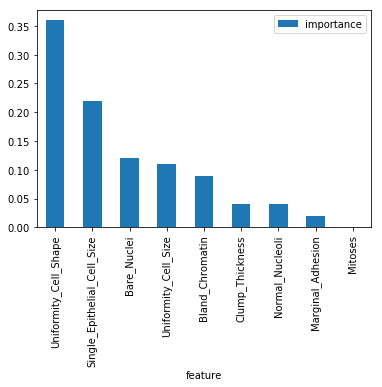

In [118]:
importances.plot.bar()

Look at the bar graph and discuss your observations with your partner. Which features are most important, and which features are least important?

## SelectFromModel

`SelectFromModel` is quite simple -- it works by using a `threshold` to simply remove those features that are below the threshold. That's it! Let's do the following: use each of the feature importances that you printed above, as a threshold value. And for each one of those threshold values, create a `SelectFromModel` instance, call `fit` and `predict` on it, and find the `accuracy_score` for that prediction. What that means is that, we will be eliminating features one by one, and printing the accuracy each time.

This part is pretty detailed, so we'll do it step by step.

First, make the following imports:<br>
`from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel`

In [109]:
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

Next, create a `RandomForestClassifier`, `fit` it to the training data, and call `predict` on the test features.

In [110]:
forest_cls = RandomForestClassifier().fit(X_train_2, y_train_2)
forest_predict = forest_cls.predict(X_test_2)

Now, call `accuracy_score` on your test data and your predictions. Print these scores using `np.round` and 2 decimal places.

In [111]:
score = accuracy_score(y_test_2, forest_predict)
print(np.round(score, decimals=2))

0.97


OK, now let's see how the accuracy changes with different thresholds that we pass to `SelectFromModel`.

Create a `thresholds` array by calling `sort` on the `feature_importances_` of your RFC model.

In [134]:
thresholds = sort(forest_cls.feature_importances_)
print(thresholds)

[ 0.00624016  0.02264144  0.04425323  0.04435899  0.0739094   0.08609375
  0.19549233  0.22552787  0.30148284]


Now, we are going to iterate through the `thresholds` array in a `for` loop. In each loop, we will do the following:
1. Call `SelectFromModel` on our model, passing the current threshold. Make sure to pass `prefit=True` since our model has been already fit on our training data (`X_train`, `y_train`).
2. Transform the training features by calling `.transform` on your training data (`X_train`). Store results in `select_X_train`.
3. Create a new `RandomForestClassifier` model, and call `.fit` on it using your transformed training features from step 2. above (`select_X_train`). Note that you can pass the original training labels `y_train` (because we are only transforming the features!)
4. Transform our test features (`X_test`) as well by calling `.transform` on them. Store results in `select_X_test`.
5. Call `.predict` on our model created in step 3., passing our transformed test features from step 4 (`select_X_test`). Store the results in `predictions`.
6. Get the `accuracy_score` between our predictions from step 5 (`predictions`) and our original test labels (`y_test`).
7. Print the following information:
    * The current threshold
    * The reduced number of features used (you can get this from `shape[1]` of `select_X_train`).
    * The accuracy for this reduced number of features (you got this in step 6.) 

What do you observe? Here is an example of the kind of analysis that you could write for Assignment 2:

*"In general, we observe the performance of the model decreases with the number of selected features. Using RFC, the optimal model (trade-off) is obtained with only 4 features. A more complex model with 7 features would lead to similar accuracy, while a simpler model with only 2 features leads to a decrease in accuracy. These features are, in order of importance Uniformity_Cell_Shape, Single_Epithelial_Cell_Size, Uniformity_cell_Size and Bare_Nuclei."*

## Recursive Feature Elimination

Recursive Feature Elimination (or RFE) removes recursively features and builds a model on those features that remain. It uses the model estimated accuracy to identify which feature (or combination of features) contribute the most and rank them.

Let's get a quick reminder of the features in order; print `df_features.columns`.

Next, `from sklearn.feature_selection import RFE`, and create a new `RandomForestClassifier`. Call it `rfc`.

Now let's create an `RFE` model and try the best `4` features. Create an instance of `RFE` and pass it your model (`rfc`), and `4` for the number of features to keep. Call your `RFE` model `rfe_model`.

Now, fit `rfe_model` to your training data (`X_train`, `y_train`). Make sure to assign the model back to the fit! (
`rfe_model = rfe_model.fit(....)`).

`print` the `support_` and `ranking_` attributes of your `rfe_model`.

The `support_` attribute returns a boolean array of the feature indices that were chosen for your model from your original feature set.

The `ranking_` attribute shows you the rank for the features!

Finally, let's evaluate our new reduced feature set model on our test data! You can call `.predict` directly on your `rfe_model`.

Finally, `print` the `accuracy_score` on your `predictions`.

Great! Again, what do the `support`, `ranking`, and the `accuracy score` suggest? Again, here's a short example of what you could write for Assignment 2:

*The top 4 features to be selected (i.e. valued as 1) for RFC model are ‘Uniformity_Cell_Shape’, ‘Uniformity_Cell_Size’, ‘Single_Epithelial_Cell_Size’ and ‘Bare_Nuclei’. The performance of this model counting only 4 features leads to an estimated test accuracy of (some value) %*.



#### Great job! Good luck on the Assignment, and let your instructor / TA know if you have any questions!